# (28751) Eggl orbit determination test

In [1]:
import grss
prop = grss.prop
fit = grss.fit

In [2]:
import numpy as np
np.set_printoptions(precision=40, linewidth=np.inf)

In [3]:
body_id = '28751'
init_sol, init_cov, nongrav_info = fit.get_sbdb_info(body_id)
body_radius = nongrav_info['radius']
de_kernel = 441

In [4]:
add_gaia_obs = True
optical_obs_file = None
t_min_tdb = None
t_max_tdb = None
debias_lowres = True
deweight = True
eliminate = False
num_obs_per_night = 4
verbose = True
obs_df = fit.get_optical_obs(body_id, optical_obs_file, t_min_tdb, t_max_tdb, debias_lowres, deweight, eliminate, num_obs_per_night, verbose)
obs_df = fit.add_radar_obs(obs_df, t_min_tdb, t_max_tdb, verbose)
if add_gaia_obs:
    gaia_dr = 'gaiafpr'
    obs_df = fit.add_gaia_obs(obs_df, t_min_tdb, t_max_tdb, gaia_dr, verbose)

Read in 1493 observations from the MPC.
	Filtered to 1493 observations that satisfy the time range and accepted observatory constraints.
Applying Eggl et al. (2020) debiasing scheme to the observations.
	Unknown star catalog: GSC
	Unknown star catalog: UNK
	No debiasing needed for 587 observations.
	Debiased 891 observations.
	No bias information for 15 observations.
Applying Vereš et al. (2017) weighting scheme to the observations.
	Using 1395 CCD observations with station-specific weight rules.
Applying sqrt(N/4) deweighting scheme.
	Deweighted 297 observations.
Read in 273 Gaia observations from gaiafpr
	Filtered to 273 observations that satisfy the time range constraints.


In [5]:
n_iter_max = 10
fit_sim = fit.FitSimulation(init_sol, obs_df, init_cov, n_iter_max=n_iter_max, de_kernel=de_kernel, radius=body_radius, nongrav_info=nongrav_info)

In [6]:
fit_sim.filter_lsq()

Iteration		Unweighted RMS		Weighted RMS 		Chi-squared		Reduced Chi-squared
1			 0.383			 0.556			 854.180			 0.242
2			 0.383			 0.555			 854.605			 0.242
3			 0.383			 0.555			 854.604			 0.242
Converged without rejecting outliers. Starting outlier rejection now...
4			 0.373			 0.541			 798.531			 0.227
5			 0.373			 0.541			 798.463			 0.227
Converged after rejecting outliers. Rejected 4 out of 1766 optical observations.


In [7]:
fit_sim.print_summary()

Summary of the orbit fit calculations at iteration 5 (of 5):
RMS unweighted: 0.37303613897493515
RMS weighted: 0.5406495741717109
chi-squared: 798.4634828283107
reduced chi-squared: 0.226965174197928
square root of reduced chi-squared: 0.4764086210365299
--------------------------------------------------------------
Solution Time: MJD 57771.000 TDB = 2017-01-18 00:00:00.000 TDB
Solution Observation Arc: 10741.82 days (29.41 years)
--------------------------------------------------------------
Fitted Variable		Initial Value			Uncertainty			Fitted Value			Uncertainty			Change				Change (sigma)
e			1.13401656354e-01		2.69371758805e-09		1.13401658336e-01		2.68369136463e-09		+1.98204716528e-09		+0.736
q			2.23466547248e+00		5.19199077579e-09		2.23466546815e+00		5.17339067675e-09		-4.33048352733e-09		-0.834
tp			5.79393028847e+04		3.10452200867e-06		5.79393028873e+04		3.09808365654e-06		+2.61717650574e-06		+0.843
om			2.76278186645e+02		2.72949155643e-06		2.76278188210e+02		2.72408540069e-06

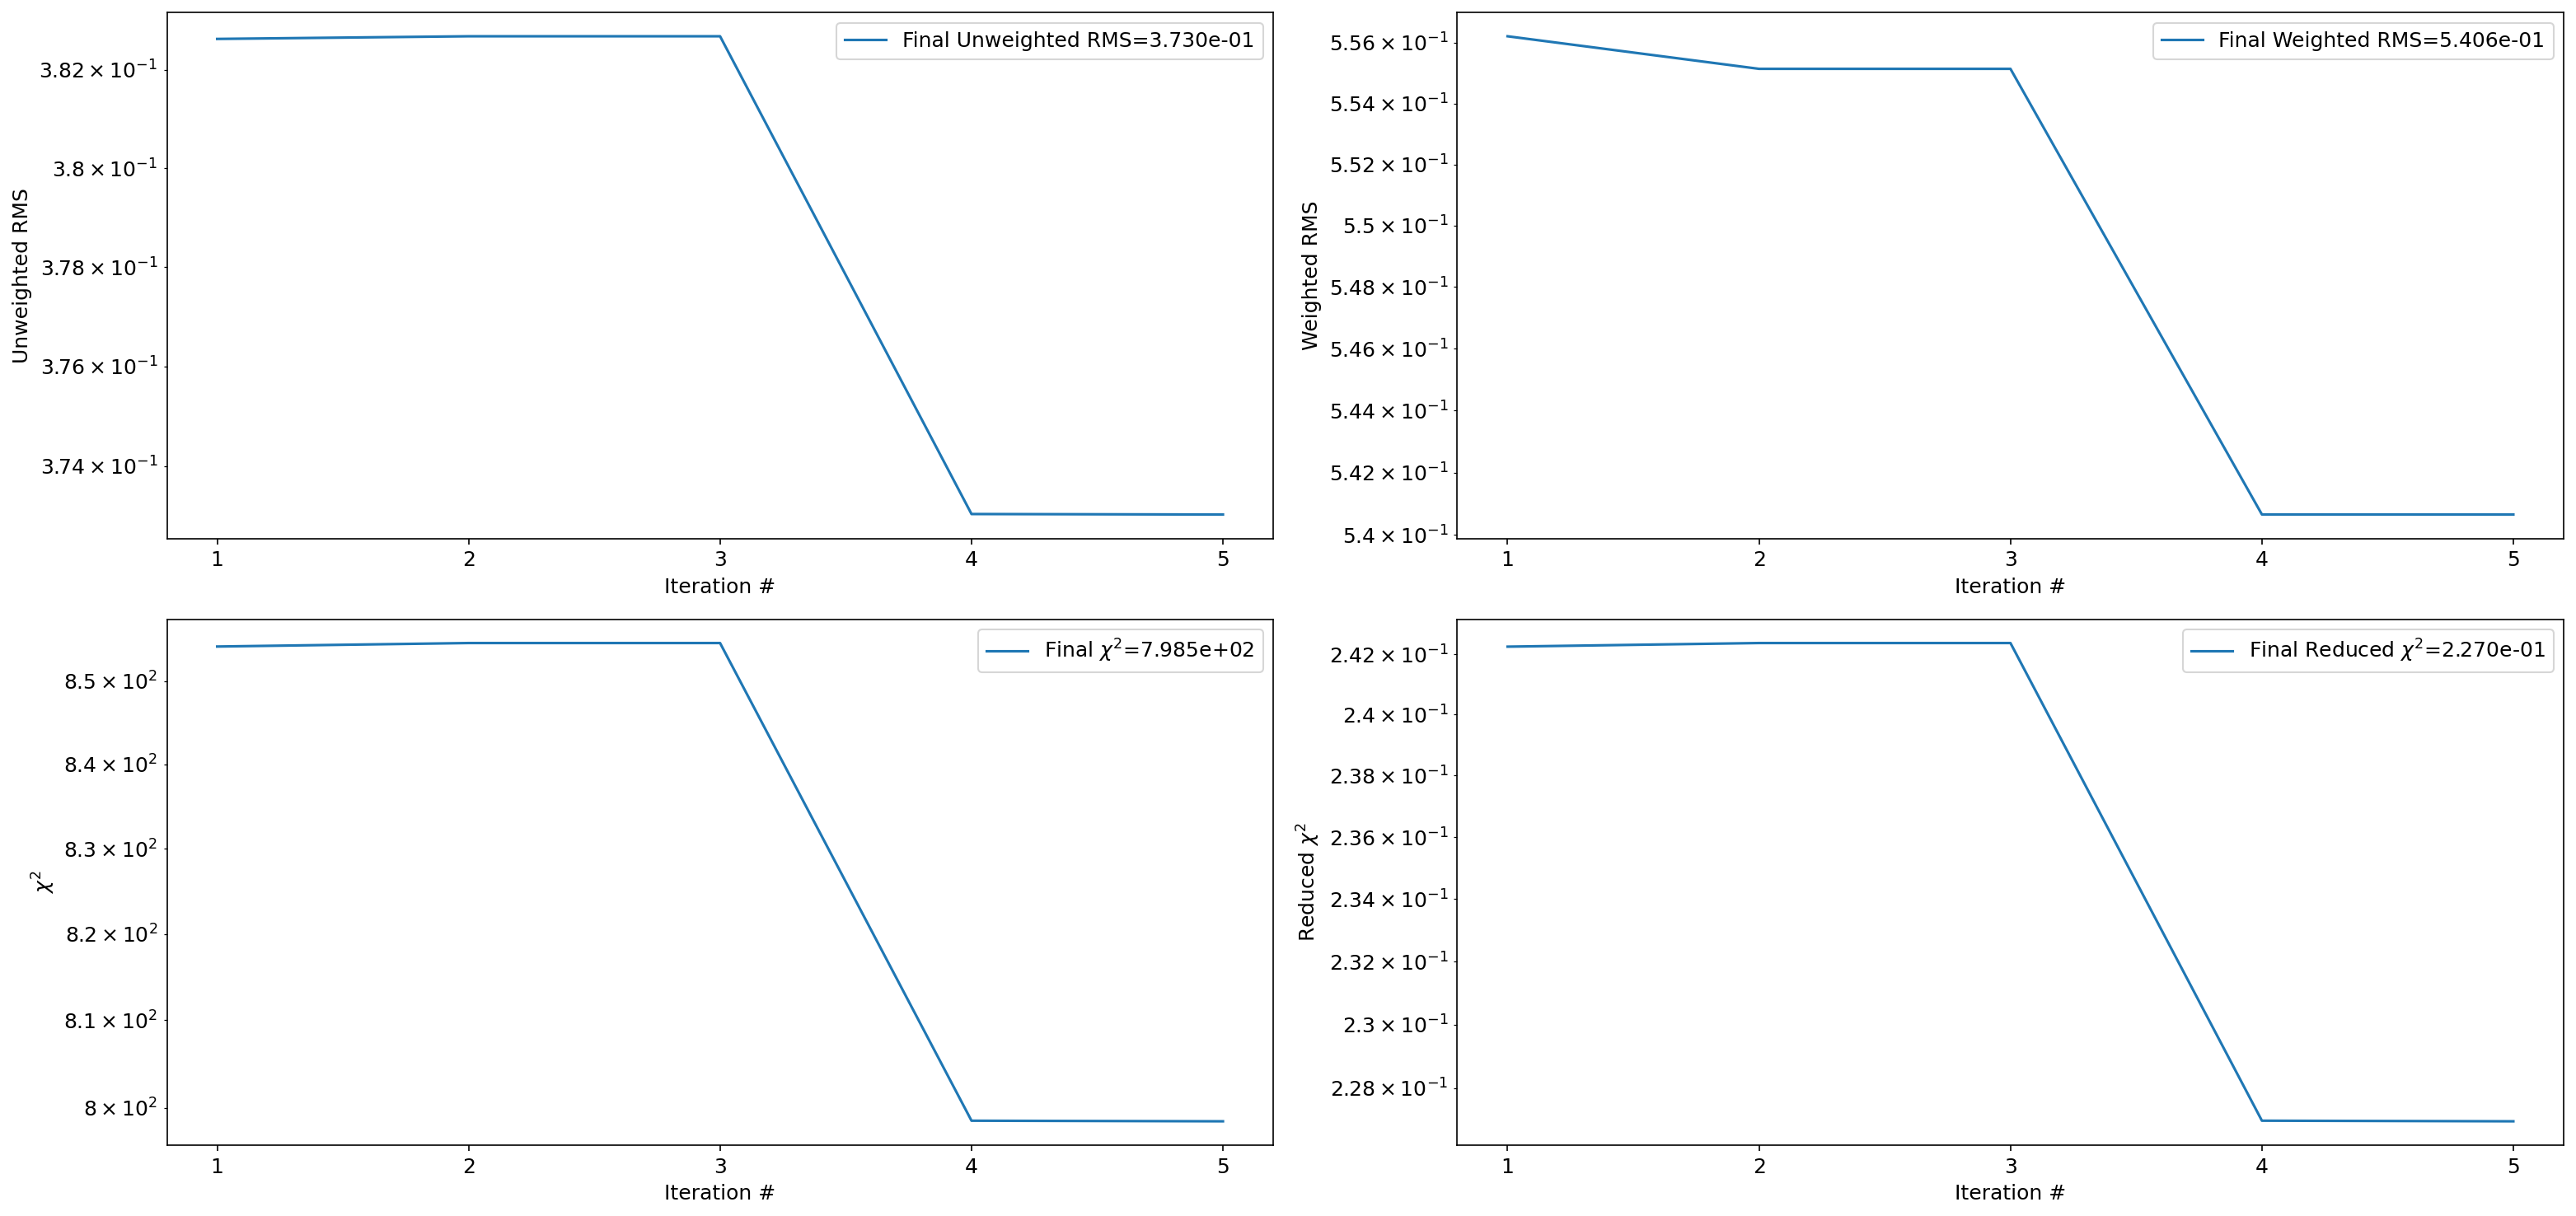

In [8]:
fit_sim.plot_summary(auto_close=True)

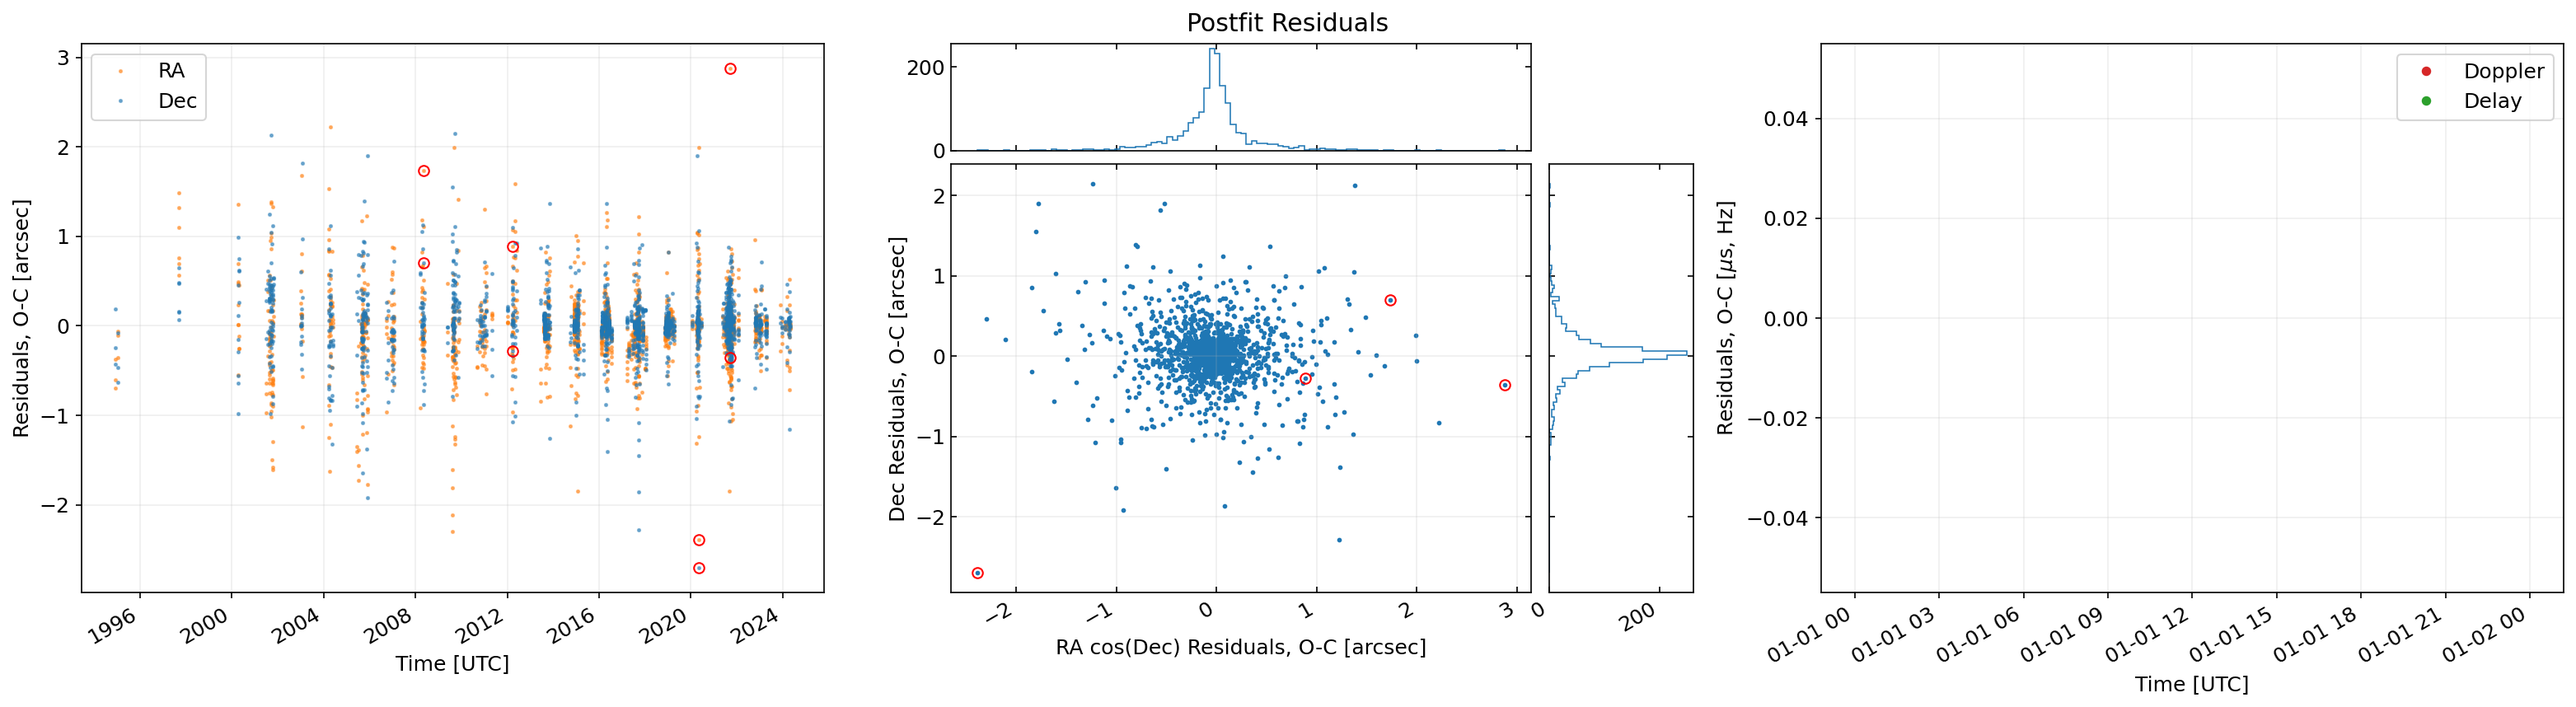

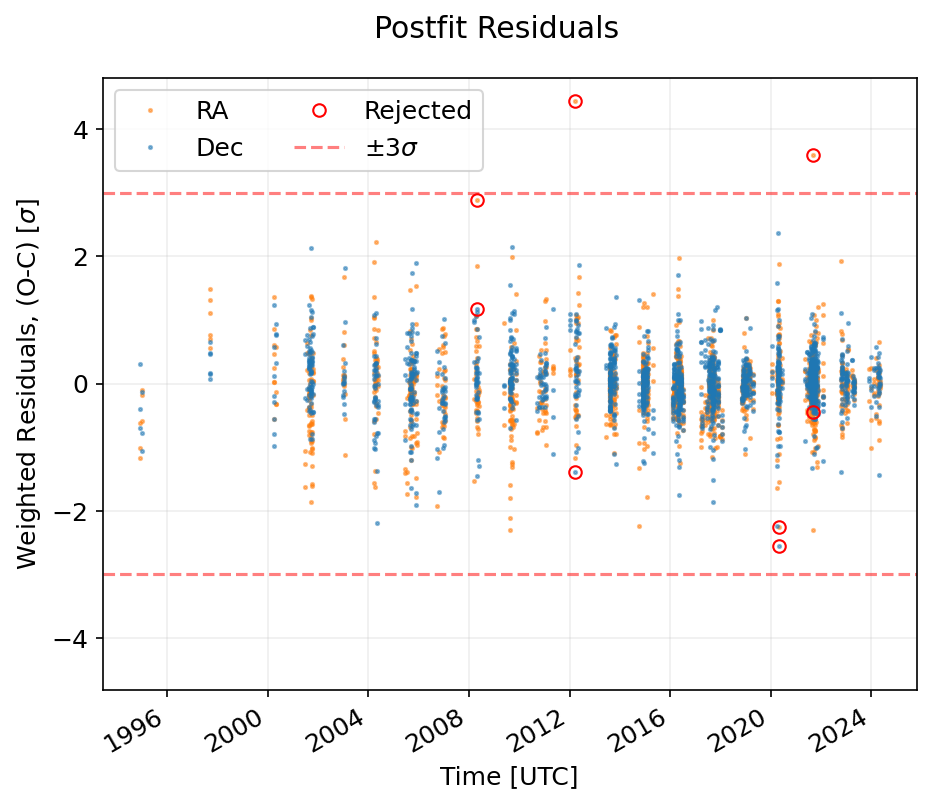

In [9]:
fit_sim.iters[-1].plot_iteration_summary(title='Postfit Residuals', auto_close=True)

In [10]:
mean_0 = np.array(list(init_sol.values())[1:])
cov_0 = init_cov
mean_f = np.array(list(fit_sim.x_nom.values()))
cov_f = fit_sim.covariance

maha_dist_f, maha_dist_0, bhattacharya, bhatt_coeff = fit.get_similarity_stats(mean_0, cov_0, mean_f, cov_f)
print(f'Mahalonobis distance between JPL and GRSS solution: {maha_dist_f:0.2f}')
print(f'Mahalonobis distance between GRSS and JPL solution: {maha_dist_0:0.2f}')
print(f'Bhattacharya distance between JPL and GRSS solution: {bhattacharya:0.4f}')
print(f'Bhattacharya coefficient between JPL and GRSS solution: {bhatt_coeff:0.4f}')

Mahalonobis distance between JPL and GRSS solution: 2.04
Mahalonobis distance between GRSS and JPL solution: 2.04
Bhattacharya distance between JPL and GRSS solution: 0.0001
Bhattacharya coefficient between JPL and GRSS solution: 0.9999


In [11]:
assert maha_dist_f < 5.0
assert maha_dist_0 < 5.0
assert bhattacharya < 0.10
assert bhatt_coeff > 0.90